################################################################################

**Author**: _Pradip Kumar Das_

**License:** https://github.com/PradipKumarDas/Competitions/blob/main/LICENSE

**Profile & Contact:** [LinkedIn](https://www.linkedin.com/in/daspradipkumar/) | [GitHub](https://github.com/PradipKumarDas) | [Kaggle](https://www.kaggle.com/pradipkumardas) | pradipkumardas@hotmail.com (Email)

################################################################################

# **Cipla Data Science Hiring Challenge**

## _**Predict the Load Sanction Amount**_

#### **Competition Provider**: HackerEarth
#### **Timeline**: Jun 18, 2021 6 PM (IST) to Jun 27, 2021 11:55 PM (IST)

**_Sections:_**
- _Dependencies_
- _Configuration_
- _Exploratory Data Analysis (EDA) & Preprocessing_
    - _Loading Data_
    - _Detecting and Handling Outliers_
    - _Handling Missing Values_
    - _Encoding Values in Categorical Variables_
- _Modeling & Evaluation_
- _Submission_
    - _Handling Missing Values_
    - _Encoding Values in Categorical Variables_
    - _Performing Predictions_
    - _Preparing for Submission_
- _Future Work_

## Dependencies

In [1]:
# Imports required packages

import pandas as pd
import numpy as np
import random

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

import gc

## Configuration

In [2]:
# Seed to reproduce the results
random.seed(42)
np.random.seed(42)

# Sets option to view all columns in DataFrame
pd.set_option("display.max_columns", None) 

## Exploratory Data Analysis (EDA) & Preprocessing

### Loading Data

In [3]:
# Loads data

train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")
submission = pd.read_csv("./Data/sample_submission.csv")

In [4]:
# Checks for dataset shapes

print(f"Dataset shape:\ttrain: {train.shape}\ttest: {test.shape}\tsubmission: {submission.shape}")

Dataset shape:	train: (30000, 24)	test: (20000, 23)	submission: (5, 2)


In [5]:
# Checks for heads of the datasets

display(train.head())

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [6]:
display(test.head())

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [7]:
# Removes columns not required from train dataset

train.drop(["Customer ID", "Name"], axis=1, inplace=True)

In [8]:
# Checks for the data types for train dataset

display(train.dtypes)

Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [9]:
# Checks for unique values in columns of 'object' data type in train dataset

with pd.option_context('display.max_colwidth', 300):
    display(pd.DataFrame(train.select_dtypes(include='object').apply(lambda x: x.unique(), axis=0)))

,0
Gender,"[F, M, nan]"
Income Stability,"[Low, High, nan]"
Profession,"[Working, Pensioner, State servant, Commercial associate, Unemployed, Student, Businessman, Maternity leave]"
Type of Employment,"[Sales staff, nan, High skill tech staff, Secretaries, Laborers, Managers, Cooking staff, Core staff, Drivers, Realty agents, Security staff, Accountants, Private service staff, Waiters/barmen staff, Medicine staff, Cleaning staff, Low-skill Laborers, HR staff, IT staff]"
Location,"[Semi-Urban, Rural, Urban]"
Expense Type 1,"[N, Y]"
Expense Type 2,"[N, Y]"
Has Active Credit Card,"[nan, Unpossessed, Active, Inactive]"
Property Location,"[Rural, Urban, Semi-Urban, nan]"


In [10]:
# Checks for missing values in train dataset

display(train.isna().sum())

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

### Detecting and Handling Outliers

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

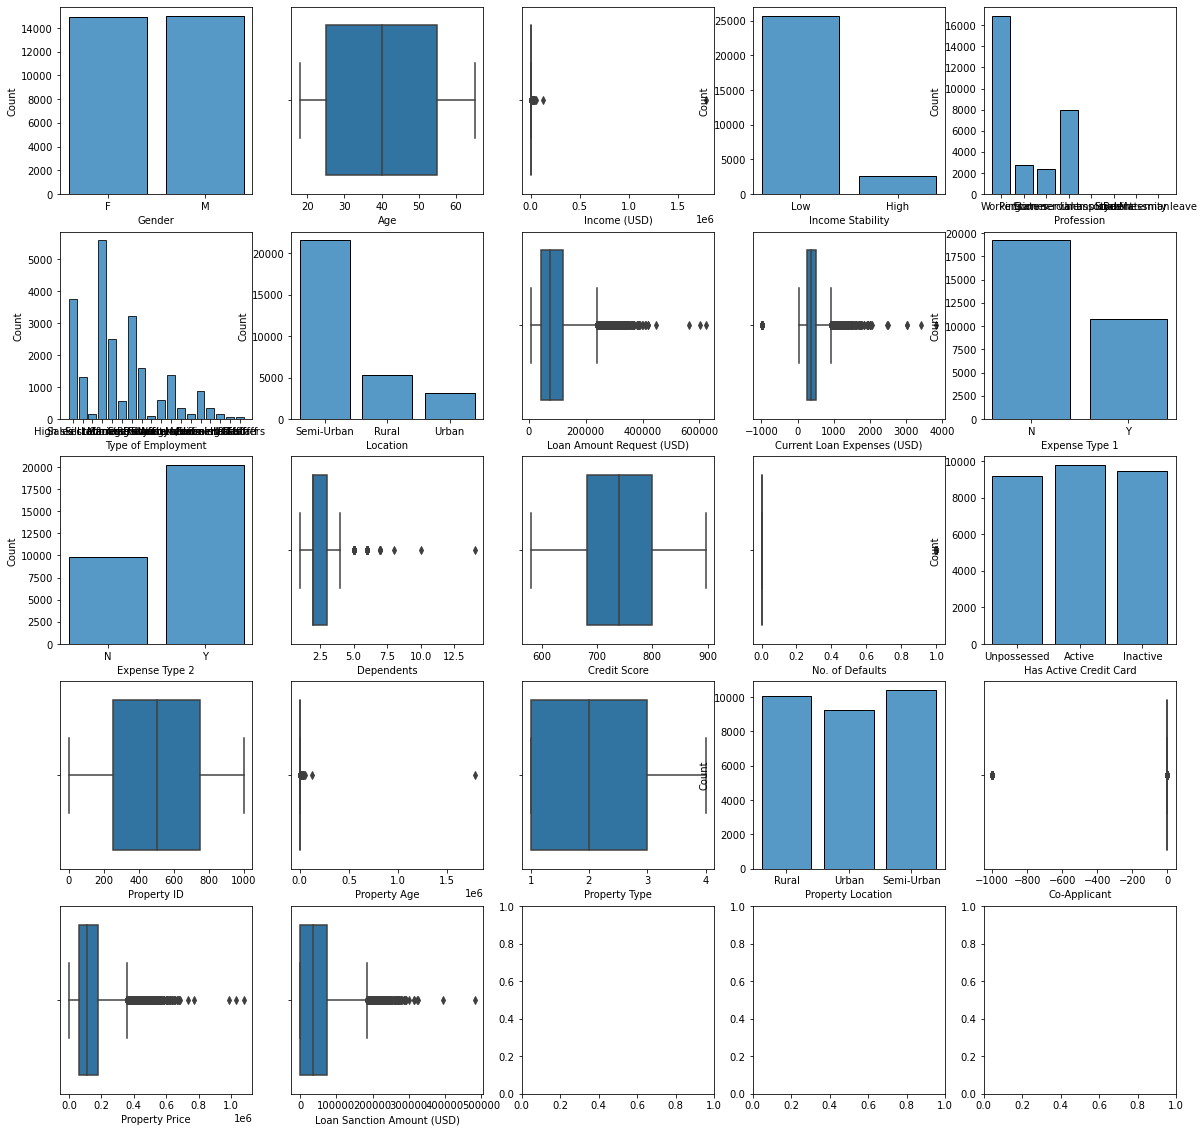

In [11]:
# Visualizes train data and detects outliers, if exist

fig, axes = plt.subplots(5,5, figsize=(20,20))

sns.histplot(train.Gender.dropna(), shrink=0.8, ax=axes[0,0])
sns.boxplot(x=train["Age"], ax=axes[0,1])
sns.boxplot(x=train["Income (USD)"], ax=axes[0,2])
sns.histplot(train["Income Stability"].dropna(), shrink=0.8, ax=axes[0,3])
sns.histplot(train["Profession"].dropna(), shrink=0.8, ax=axes[0,4])

sns.histplot(train["Type of Employment"].dropna(), shrink=0.8, ax=axes[1,0])
sns.histplot(train["Location"].dropna(), shrink=0.8, ax=axes[1,1])
sns.boxplot(x=train["Loan Amount Request (USD)"], ax=axes[1,2])
sns.boxplot(x=train["Current Loan Expenses (USD)"], ax=axes[1,3])
sns.histplot(train["Expense Type 1"].dropna(), shrink=0.8, ax=axes[1,4])

sns.histplot(train["Expense Type 2"].dropna(), shrink=0.8, ax=axes[2,0])
sns.boxplot(x=train["Dependents"], ax=axes[2,1])
sns.boxplot(x=train["Credit Score"], ax=axes[2,2])
sns.boxplot(x=train["No. of Defaults"], ax=axes[2,3])
sns.histplot(train["Has Active Credit Card"].dropna(), shrink=0.8, ax=axes[2,4])

sns.boxplot(x=train["Property ID"], ax=axes[3,0])
sns.boxplot(x=train["Property Age"], ax=axes[3,1])
sns.boxplot(x=train["Property Type"], ax=axes[3,2])
sns.histplot(train["Property Location"].dropna(), shrink=0.8, ax=axes[3,3])
sns.boxplot(x=train["Co-Applicant"], ax=axes[3,4])

sns.boxplot(x=train["Property Price"], ax=axes[4,0])
sns.boxplot(x=train["Loan Sanction Amount (USD)"], ax=axes[4,1])


**Handling outliers from column "Income (USD)"**

In [11]:
# Checks the income distribution

train["Income (USD)"].describe()

count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64

<AxesSubplot:xlabel='Income (USD)'>

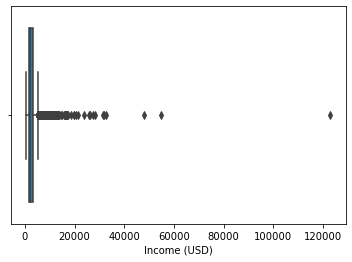

In [12]:
# Checking for further outliers just by taking out one shown in the earlier sub-plot

sns.boxplot(x=train["Income (USD)"][train["Income (USD)"] < 0.5*1e6])

In [13]:
# Removes samples having income 40,000 or more considering them outliers

train.drop(train[train["Income (USD)"] > 40000].index, inplace=True)

**Handling outliers from column "Current Loan Expenses (USD)"**

In [14]:
# Checks the requestd loan amount distribution

train["Current Loan Expenses (USD)"].describe()

count    29824.000000
mean       400.856240
std        242.357444
min       -999.000000
25%        247.657500
50%        375.150000
75%        521.232500
max       3840.880000
Name: Current Loan Expenses (USD), dtype: float64

In [15]:
len(train[train["Current Loan Expenses (USD)"] < 0])

177

In [16]:
# Replaces negative values with NaN to process later

train["Current Loan Expenses (USD)"].replace(-999.0, np.nan, inplace=True)

**Handling outliers from column "Co-Applicant"**

In [17]:
train["Co-Applicant"].describe()

count    29996.000000
mean        -4.744566
std         74.619543
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64

In [18]:
len(train[train["Co-Applicant"] < 0])

168

In [19]:
# Replaces negative values with NaN to process later

train["Co-Applicant"].replace(-999.0, np.nan, inplace=True)

**Handling outliers from column "Property Price"**

In [20]:
train["Property Price"].describe()

count    2.999600e+04
mean     1.317441e+05
std      9.353773e+04
min     -9.990000e+02
25%      6.057128e+04
50%      1.099823e+05
75%      1.788698e+05
max      1.077967e+06
Name: Property Price, dtype: float64

In [21]:
len(train[train["Property Price"] < 0])

352

In [22]:
# Replaces negative values with NaN to process later

train["Property Price"].replace(-999.0, np.nan, inplace=True)

**Handling outliers from column "Loan Sanction Amount (USD)"**

In [23]:
train["Loan Sanction Amount (USD)"].describe()

count     29656.000000
mean      47648.405162
std       48218.565977
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64

In [24]:
len(train[train["Loan Sanction Amount (USD)"] < 0])

338

In [25]:
# Replaces negative values with NaN to process later

train["Loan Sanction Amount (USD)"].replace(-999.0, np.nan, inplace=True)

**Visualizes data pairing variables**

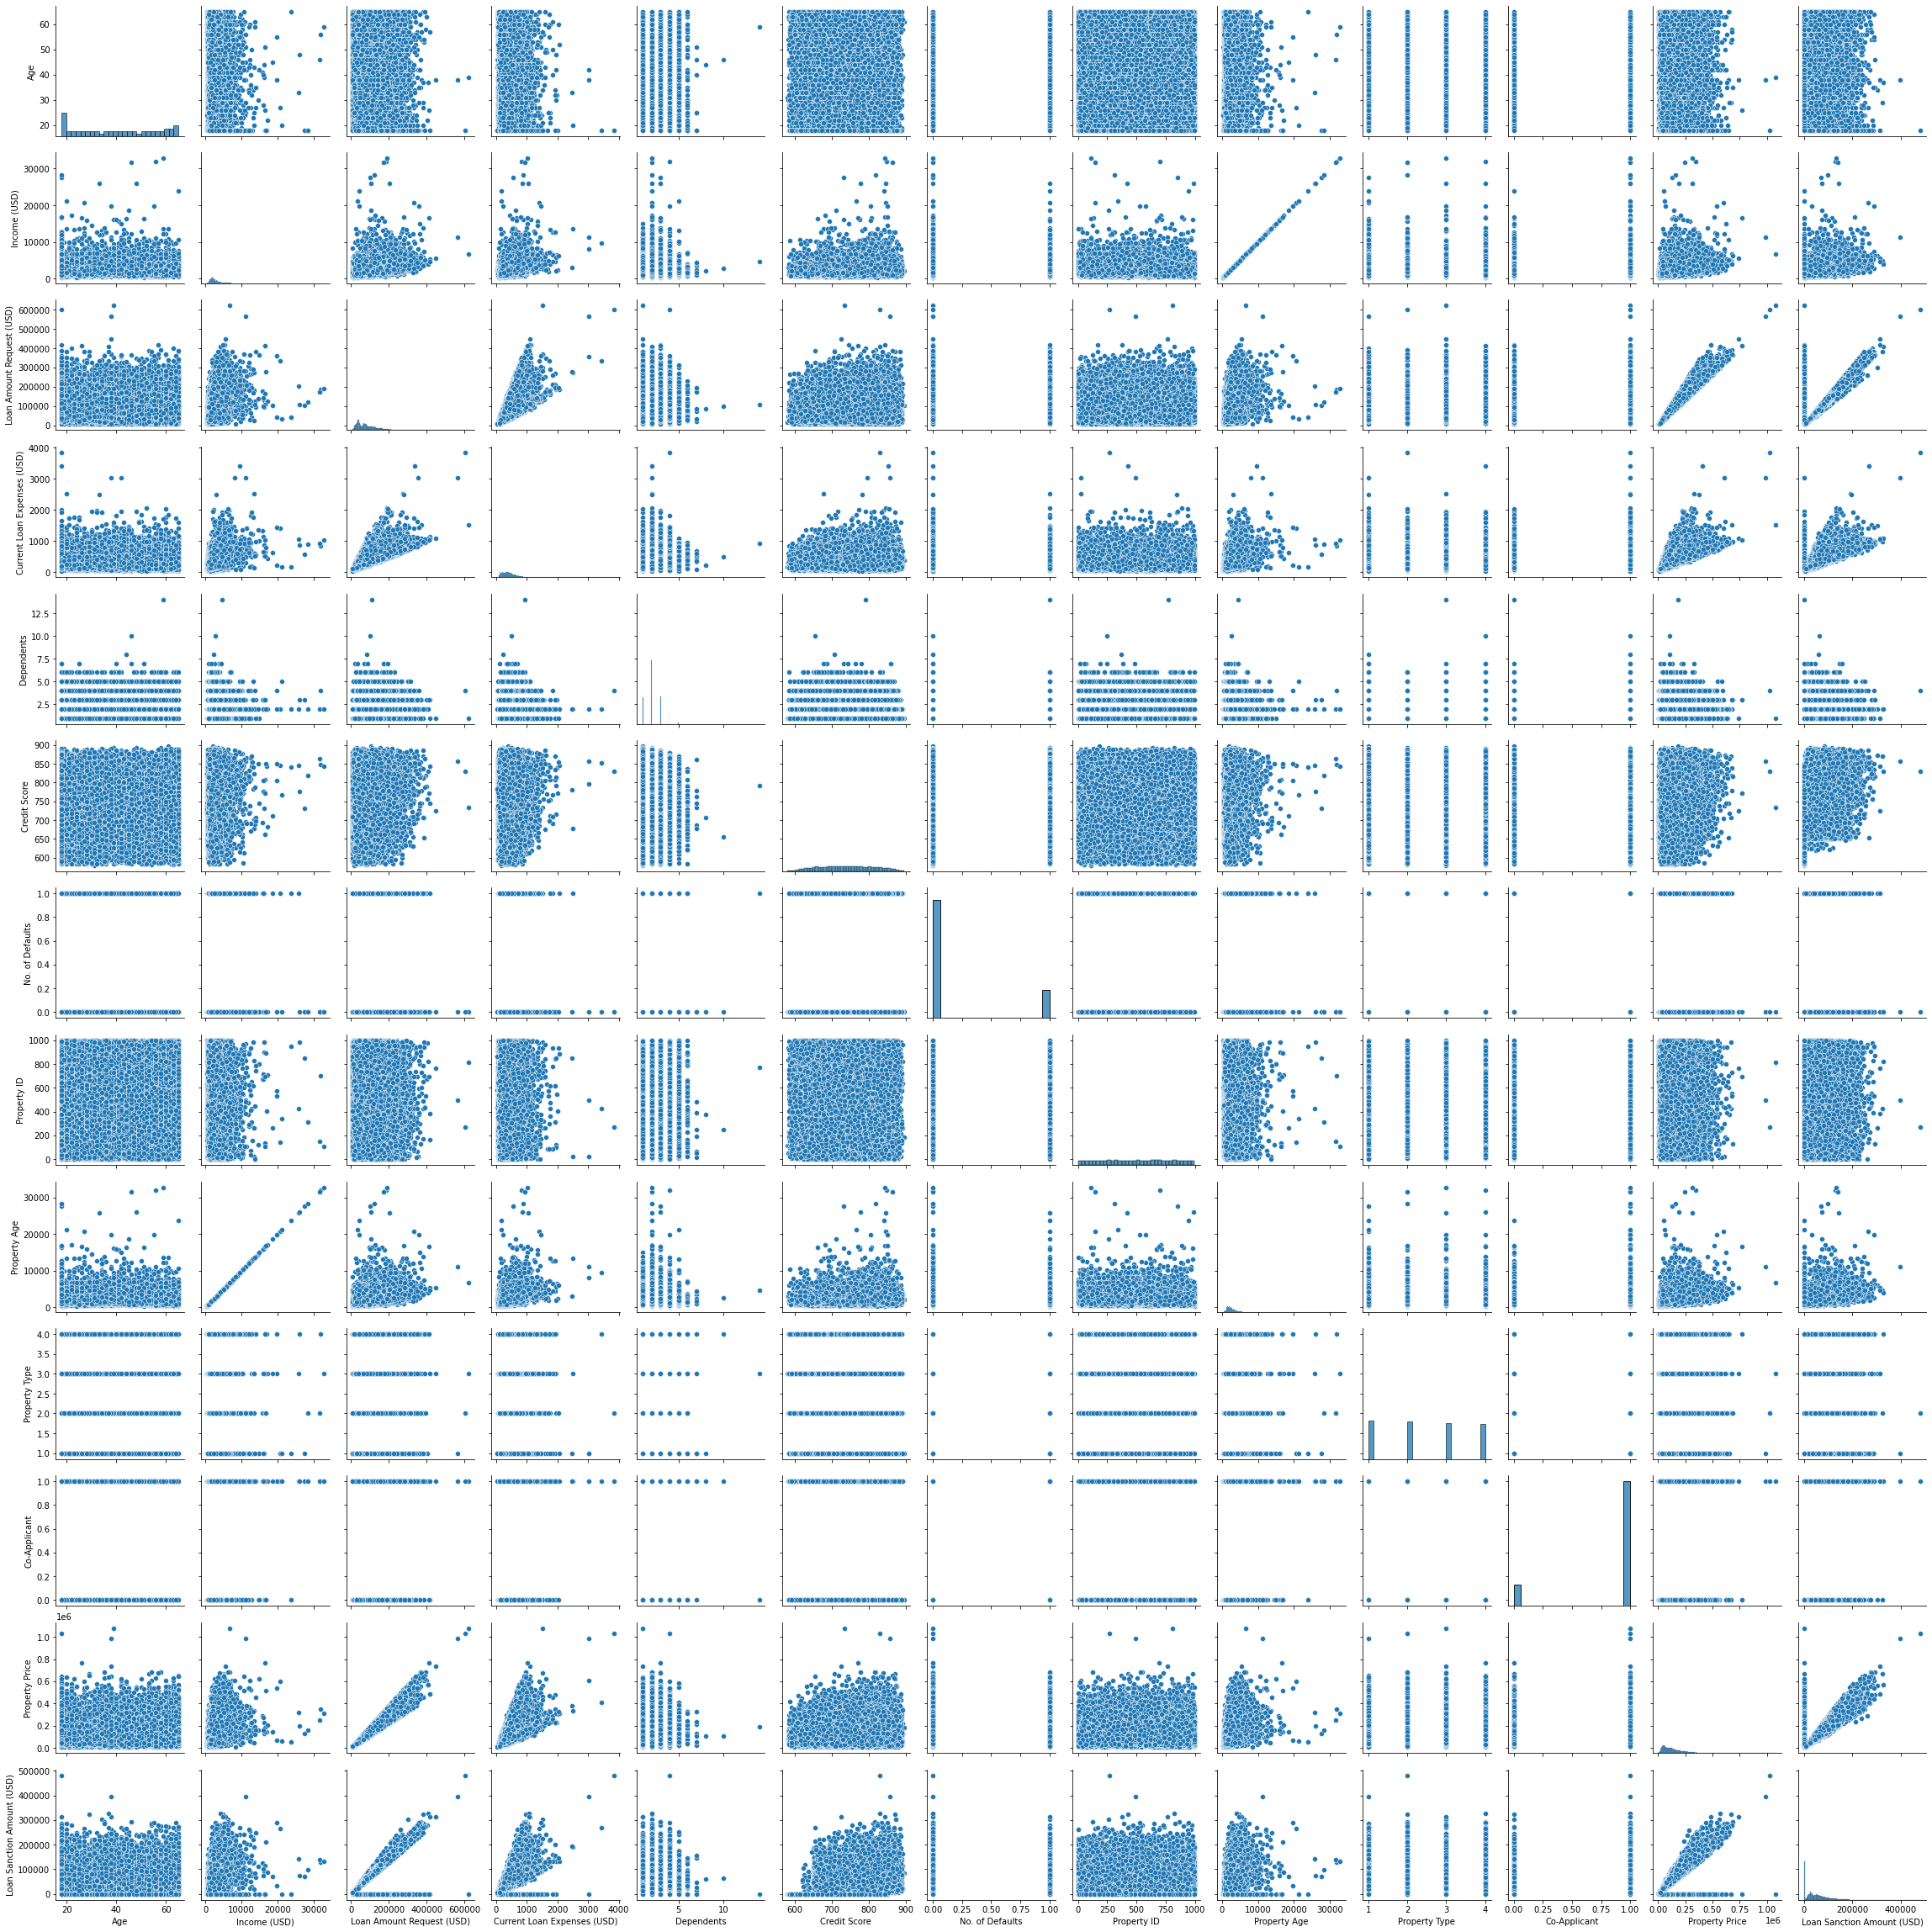

In [207]:
sns.pairplot(train)

In [26]:
# Finding strong correlation between variables Income (USD) and Property Age,
# finds if one is duplicate of other one

len(train[train["Income (USD)"] == train["Property Age"]])

25146

In [27]:
# Removes column "Property Age" considering it a duplicate of column "Income (USD)"

train.drop(["Property Age"], axis=1, inplace=True)

### Handling Missing Values

In [28]:
# Resets index post removal of few rows from the dataset

train.reset_index(inplace=True, drop=True)

**Handling missing value for variable _Gender_**

In [29]:
# Imputes missing values in Gender

gender_imputer = SimpleImputer(strategy="most_frequent")
train["Gender"] = gender_imputer.fit_transform(train[["Gender"]]).reshape(-1)

**Handling missing value for all numeric variables except variabel "Loan Sanction Amount (USD)"**

In [30]:
train_numeric_1 = train.select_dtypes(include=["float", "int"]).drop("Loan Sanction Amount (USD)", axis=1)

numeric_features_imputer_1 = IterativeImputer(random_state=0)

train[train_numeric_1.columns.tolist()] = pd.DataFrame(
    numeric_features_imputer_1.fit_transform(train_numeric_1))

**Handling missing value in variabel "Loan Sanction Amount (USD)"**

In [31]:
train_numeric_2 = train.select_dtypes(include=["float", "int"])

numeric_features_imputer_2 = IterativeImputer(random_state=1)

train[train_numeric_2.columns.tolist()] = pd.DataFrame(
    numeric_features_imputer_2.fit_transform(train_numeric_2))

In [121]:
train.loc[train[train["Loan Sanction Amount (USD)"] < 0.0].index, "Loan Sanction Amount (USD)"] = 0.0

In [32]:
# Changes data type back to 'int'

train.Age = train.Age.astype(int)
train.Dependents = train.Dependents.astype("int")
train["No. of Defaults"] = train["No. of Defaults"].astype(int)
train["Property ID"] = train["Property ID"].astype(int)
train["Property Type"] = train["Property Type"].astype(int)
train["Co-Applicant"] = train["Co-Applicant"].astype(int)

**Handling missing value for variable _Income Stability_**

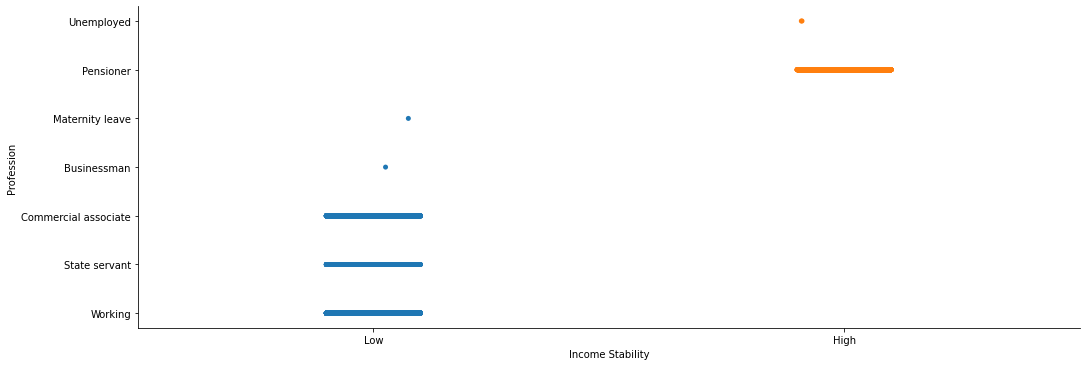

In [33]:
# Checks if variable Income Stability is correlated with variable Profession

sns.catplot(data=train, x="Income Stability", y="Profession", aspect=3)

In [34]:
# Above plot shows that pensioners and unemployed people have income stability.
# Finds numbers of rows with missing income stability with prefession as pensioner

len(train[train["Income Stability"].isna()].query("`Profession` == 'Pensioner'"))

176

In [35]:
# Imputes missing values in column "Income Stability" with "High" if values in "Profession" column 
# is either "Pensioner" or "Unemployed", and "Low" for all other professions

train.loc[train[train["Income Stability"].isna()].query(
    "`Profession` == 'Pensioner' or `Profession` == 'Unemployed'").index, "Income Stability"] = "High"

train.loc[train[train["Income Stability"].isna()].index, "Income Stability"] = "Low"

**Handling missing value for variable _Type of Employment_**

In [36]:
type_of_employment_imputer = SimpleImputer(strategy="most_frequent")
train["Type of Employment"] = type_of_employment_imputer.fit_transform(train[["Type of Employment"]]).reshape(-1)

**Handling missing value for variable _Has Active Credit Card_**

In [37]:
has_active_credit_card_imputer = SimpleImputer(strategy="most_frequent")
train["Has Active Credit Card"] = has_active_credit_card_imputer.fit_transform(
    train[["Has Active Credit Card"]]).reshape(-1)

**Handling missing value for variable _Property Location_**

In [38]:
property_location_imputer = SimpleImputer(strategy="most_frequent")
train["Property Location"] = property_location_imputer.fit_transform(
    train[["Property Location"]]).reshape(-1)

### Encoding Values in Categorical Variables

In [39]:
# One-hot encodes column "Gender"

train = train.join(pd.get_dummies(train.Gender, prefix="Gender")).drop("Gender", axis=1)

In [40]:
# Encodes column "Income Stability"

train["Income Stability"] = train["Income Stability"].map({"Low": 0, "High": 1})

In [41]:
# Encodes column "Profession"

profession_encoder = OneHotEncoder(dtype="int")

train = train.join(
            pd.DataFrame.sparse.from_spmatrix(
                profession_encoder.fit_transform(train[["Profession"]]), 
                columns="Profession " + profession_encoder.categories_[0])).drop("Profession", axis=1)

In [43]:
# Encodes column "Type of Employment"

employment_type_encoder = OneHotEncoder(dtype="int")

train = train.join(
            pd.DataFrame.sparse.from_spmatrix(
                employment_type_encoder.fit_transform(train[["Type of Employment"]]), 
                columns="Employment Type " + employment_type_encoder.categories_[0])).drop("Type of Employment", axis=1)

In [44]:
# Encodes column "Location"

location_encoder = OneHotEncoder(dtype="int")

train = train.join(
            pd.DataFrame.sparse.from_spmatrix(
                location_encoder.fit_transform(train[["Location"]]), 
                columns="Location " + location_encoder.categories_[0])).drop("Location", axis=1)

In [45]:
# Encodes columns "Expense Type 1" and "Expense Type 2"

train["Expense Type 1"] = train["Expense Type 1"].map({"N": 0, "Y": 1})
train["Expense Type 2"] = train["Expense Type 2"].map({"N": 0, "Y": 1})

In [46]:
# Encodes column "Has Active Credit Card"

credit_card_encoder = OneHotEncoder(dtype="int")

train = train.join(
            pd.DataFrame.sparse.from_spmatrix(
                credit_card_encoder.fit_transform(train[["Has Active Credit Card"]]), 
                columns="Credit Card " + credit_card_encoder.categories_[0])).drop("Has Active Credit Card", axis=1)

In [47]:
# Encodes column "Property Location"

property_location_encoder = OneHotEncoder(dtype="int")

train = train.join(
            pd.DataFrame.sparse.from_spmatrix(
                property_location_encoder.fit_transform(train[["Property Location"]]), 
                columns="Property Location " + property_location_encoder.categories_[0])).drop("Property Location", axis=1)

## Modeling & Evaluation

In [123]:
# Seperates features and labels for model training

X, y = train.drop("Loan Sanction Amount (USD)", axis=1), train["Loan Sanction Amount (USD)"]

In [124]:
# Checks cross-validation scores on Decision Tree

decision_tree_regressor = DecisionTreeRegressor(random_state=0)
cv_scores = cross_val_score(decision_tree_regressor, X, y, scoring="neg_mean_absolute_error", cv=5)
abs(cv_scores)

/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/val

array([13365.81376315, 14412.01453489, 13328.94139052, 13611.46776929,
       13504.23430714])

In [125]:
# Checks cross-validation scores on Random Forest

random_forest_regressor = RandomForestRegressor()
cv_scores = cross_val_score(random_forest_regressor, X, y, scoring="neg_mean_absolute_error", cv=5)
abs(cv_scores)

/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:516: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/pradip/anaconda3/lib/python3.7/site-packages/sklearn/utils/val

array([11411.38617276, 11552.72241807, 11353.05617412, 11019.29947945,
       11058.06577568])

In [126]:
# Checks cross-validation scores on XGBoost

xgboost_regressor = xgb.XGBRegressor()

cv_scores = cross_val_score(xgboost_regressor, X, y, scoring="neg_mean_absolute_error", cv=5)
abs(cv_scores)

array([11399.42264373, 11534.48813847, 11291.93039181, 11137.84885117,
       11183.21461558])

In [127]:
# Decides on the model and fits on the train data

model = xgb.XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Submission

### Handling Missing Values

In [53]:
# Removes columns not required

test.drop(["Customer ID", "Name", "Property Age"], axis=1, inplace=True)

In [54]:
# Checks for column data types

test.dtypes

Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

**Comment:** Data type for columns "Co-Applicant" and "Property Price" should have been numeric in "test" dataset, but found to be "object".
That needs to be changed. But, let's find the reason first for this.

In [55]:
test["Co-Applicant"].unique()

array(['1', '0', '?'], dtype=object)

In [56]:
test["Co-Applicant"].replace('?', np.nan, inplace=True)
test["Property Price"].replace('?', np.nan, inplace=True)

In [57]:
test["Co-Applicant"] = test["Co-Applicant"].astype('float')
test["Property Price"] = test["Property Price"].astype('float')

**Imputes missing values in variable Gender**

In [58]:
test["Gender"] = gender_imputer.transform(test[["Gender"]]).reshape(-1)

**Imputes missing values in numeric variables**

In [59]:
test_numeric_1 = test.select_dtypes(include=["float", "int"])
test[test_numeric_1.columns.tolist()] = pd.DataFrame(
    numeric_features_imputer_1.transform(test_numeric_1))

In [60]:
test["Age"] = test["Age"].astype('int')
test["Dependents"] = test["Dependents"].astype('int')
test["No. of Defaults"] = test["No. of Defaults"].astype('int')
test["Property ID"] = test["Property ID"].astype('int')
test["Property Type"] = test["Property Type"].astype('int')
test["Co-Applicant"] = test["Co-Applicant"].astype('int')

**Imputes missing values in variable Income Stability**

In [61]:
# Imputes missing values in column "Income Stability" with "High" if values in "Profession" column 
# is either "Pensioner" or "Unemployed", and "Low" for all other professions

test.loc[test[test["Income Stability"].isna()].query(
    "`Profession` == 'Pensioner' or `Profession` == 'Unemployed'").index, "Income Stability"] = "High"

test.loc[test[test["Income Stability"].isna()].index, "Income Stability"] = "Low"

**Imputes missing values in variable Type of Employment**

In [62]:
test["Type of Employment"] = type_of_employment_imputer.transform(test[["Type of Employment"]]).reshape(-1)


**Imputes missing values in variable Has Active Credit Card**

In [63]:
test["Has Active Credit Card"] = has_active_credit_card_imputer.transform(
    test[["Has Active Credit Card"]]).reshape(-1)

**Imputes missing values in variable Property Location**

In [64]:
test["Property Location"] = property_location_imputer.transform(
    test[["Property Location"]]).reshape(-1)

### Encoding Values in Categorical Variables

In [65]:
# One-hot encodes column "Gender"

test = test.join(pd.get_dummies(test.Gender, prefix="Gender")).drop("Gender", axis=1)

In [66]:
# Encodes column "Income Stability"

test["Income Stability"] = test["Income Stability"].map({"Low": 0, "High": 1})

In [67]:
# Encodes column "Profession"

test = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                profession_encoder.transform(test[["Profession"]]), 
                columns="Profession " + profession_encoder.categories_[0])).drop("Profession", axis=1)

In [69]:
# Encodes column "Type of Employment"

test = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                employment_type_encoder.transform(test[["Type of Employment"]]), 
                columns="Employment Type " + employment_type_encoder.categories_[0])).drop("Type of Employment", axis=1)

In [70]:
# Encodes column "Location"

test = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                location_encoder.transform(test[["Location"]]), 
                columns="Location " + location_encoder.categories_[0])).drop("Location", axis=1)

In [71]:
# Encodes columns "Expense Type 1" and "Expense Type 2"

test["Expense Type 1"] = test["Expense Type 1"].map({"N": 0, "Y": 1})
test["Expense Type 2"] = test["Expense Type 2"].map({"N": 0, "Y": 1})

In [72]:
# Encodes column "Has Active Credit Card"

test = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                credit_card_encoder.transform(test[["Has Active Credit Card"]]), 
                columns="Credit Card " + credit_card_encoder.categories_[0])).drop("Has Active Credit Card", axis=1)

In [73]:
# Encodes column "Property Location"

test = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                property_location_encoder.transform(test[["Property Location"]]), 
                columns="Property Location " + property_location_encoder.categories_[0])).drop("Property Location", axis=1)

### Performing Predictions

In [133]:
predictions = pd.Series(model.predict(test), name="Loan Sanction Amount (USD)")

In [139]:
predictions.loc[predictions[predictions < 0.0].index] = 0.0

In [145]:
submission = pd.DataFrame({"Customer ID": pd.read_csv("./Data/test.csv")["Customer ID"], 
                           "Loan Sanction Amount (USD)": predictions})

In [147]:
display(submission)

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,97294.867188
1,C-35067,71346.828125
2,C-34590,0.000000
3,C-16668,56160.484375
4,C-12196,71255.976562
...,...,...
19995,C-9076,92019.140625
19996,C-17587,30162.015625
19997,C-46479,3059.488281
19998,C-3099,73228.937500


### Preparing for Submission

In [149]:
submission.to_csv("./Data/submission.csv", index=False)

## Future Work

#### The future work on this machine learning problem is considered to be the followings.
- Applying Dimensionality Reduction (PCA or like) on the training dataset
- Performing hyperparameter tuning during machine learning model training 
- Validating performance of other boosting algorithms (e.g. LightGBM and Catboost)